In [1]:
%matplotlib inline
import pandas as pd
import utils

# Load data

In [2]:
data = utils.get_socrata_data("https://data.nasa.gov/resource/tfkf-kniw.json")
landslide = pd.DataFrame(data)

Got https://data.nasa.gov/resource/tfkf-kniw.json?%24offset=0&%24limit=50000
Writing tfkf-kniw.json?%24offset=0&%24limit=50000


In [3]:
landslide.head()

,adminname1,adminname2,cat_id,cat_src,changeset_id,continentcode,country,countrycode,countryname,date,...,nearest_places,photos_link,population,source_link,source_name,storm_name,time,trigger,tstamp,version
0,Western,NaN,4288,glc,1,OC,Fiji,FJ,Fiji,2012-03-30T00:00:00.000,...,Kyasawa Group,NaN,14596,NaN,NaN,NaN,NaN,Downpour,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1
1,Rio de Janeiro,Rio de Janeiro,1673,glc,1,SA,Brazil,BR,Brazil,2010-04-06T00:00:00.000,...,Barao da Torre 36,NaN,6023699,NaN,NaN,NaN,NaN,Downpour,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1
2,Pernambuco,Recife,3786,glc,1,SA,Brazil,BR,Brazil,2011-07-16T00:00:00.000,...,Recife,NaN,1478098,NaN,NaN,NaN,NaN,Downpour,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1
3,Oregon,obe,8786,glc,2313744621,NA,NaN,US,United States,2011-04-08T00:00:00.000,...,"OR 82, milepost 48",NaN,1940,NaN,Oregon DOT,NaN,19:38,NaN,Fri Jul 08 2016 16:53:56 GMT+0000 (UTC),1
4,Oregon,obe,8493,glc,258758464,NA,NaN,US,United States,2013-01-30T00:00:00.000,...,"US 101, milepost 54.9",NaN,1286,NaN,Oregon DOT,NaN,15:36,NaN,Wed Jul 06 2016 19:26:41 GMT+0000 (UTC),1


In [4]:
landslide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 34 columns):
adminname1              9447 non-null object
adminname2              6542 non-null object
cat_id                  9530 non-null object
cat_src                 9528 non-null object
changeset_id            9555 non-null object
continentcode           9522 non-null object
country                 6167 non-null object
countrycode             9522 non-null object
countryname             9522 non-null object
date                    9563 non-null object
distance                9530 non-null object
fatalities              8212 non-null object
geolocation             9564 non-null object
hazard_type             9555 non-null object
id                      9564 non-null object
injuries                3942 non-null object
key                     9536 non-null object
landslide_size          8774 non-null object
landslide_type          9546 non-null object
latitude                9564 non-null 

# Analysis

In [6]:
landslide.countryname.value_counts().reset_index()

,index,countryname
0,United States,3021
1,India,1273
2,Philippines,676
3,Nepal,483
4,China,426
5,Indonesia,356
6,United Kingdom,231
7,Brazil,214
8,Canada,174
9,Malaysia,172


In [8]:
landslide.landslide_type.value_counts().reset_index()

,index,landslide_type
0,Landslide,6673
1,Mudslide,1830
2,Rockfall,486
3,Complex,232
4,Debris_Flow,173
5,Other,66
6,Riverbank_Collapse,28
7,Unknown,18
8,mudslide,7
9,Lahar,7


In [32]:
landslide["fatalities_num"] = pd.to_numeric(landslide["fatalities"], errors="coerce")

In [33]:
landslide.fatalities_num.sum()

29047.0

In [34]:
landslide.fatalities_num.describe()

count    8212.000000
mean        3.537141
std        64.669763
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      5000.000000
Name: fatalities_num, dtype: float64

In [36]:
landslide["injuries_num"] = pd.to_numeric(landslide["injuries"], errors="coerce")

In [37]:
landslide.injuries_num.sum()

3360.0

# United States' only

In [14]:
usa = landslide[landslide.countryname == 'United States']

In [19]:
usa.head(10)

,adminname1,adminname2,cat_id,cat_src,changeset_id,continentcode,country,countrycode,countryname,date,...,nearest_places,photos_link,population,source_link,source_name,storm_name,time,trigger,tstamp,version
3,Oregon,obe,8786,glc,2313744621,NA,NaN,US,United States,2011-04-08T00:00:00.000,...,"OR 82, milepost 48",NaN,1940,NaN,Oregon DOT,NaN,19:38,NaN,Fri Jul 08 2016 16:53:56 GMT+0000 (UTC),1
4,Oregon,obe,8493,glc,258758464,NA,NaN,US,United States,2013-01-30T00:00:00.000,...,"US 101, milepost 54.9",NaN,1286,NaN,Oregon DOT,NaN,15:36,NaN,Wed Jul 06 2016 19:26:41 GMT+0000 (UTC),1
5,Oregon,obe,8648,glc,1198835463,NA,NaN,US,United States,2012-03-15T00:00:00.000,...,"OR 47, milepost 57",NaN,2151,NaN,Oregon DOT,NaN,14:01,NaN,Thu Jul 07 2016 17:44:47 GMT+0000 (UTC),1
6,Oregon,obe,8595,glc,911438710,NA,NaN,US,United States,2012-04-14T00:00:00.000,...,"OR 255, milepost 353",NaN,6336,NaN,Oregon DOT,NaN,12:24,NaN,Thu Jul 07 2016 15:57:26 GMT+0000 (UTC),1
7,Oregon,obe,8240,glc,2186156602,NA,NaN,US,United States,2014-12-24T00:00:00.000,...,"OR 255, milepost 352",NaN,6336,NaN,Oregon DOT,NaN,13:05,NaN,Tue Jul 05 2016 17:03:18 GMT+0000 (UTC),1
9,Oregon,obe,8556,glc,3215588083,NA,NaN,US,United States,2012-11-20T00:00:00.000,...,"US 101, milepost 337",NaN,2253,NaN,Oregon DOT,NaN,6:10,NaN,Thu Jul 07 2016 15:11:11 GMT+0000 (UTC),1
13,Oregon,obe,8090,glc,2414001505,NA,NaN,US,United States,2015-12-09T00:00:00.000,...,"OR 37, milepost 11.5",NaN,2043,NaN,Oregon DOT,NaN,7:06,NaN,Thu Jun 30 2016 19:27:25 GMT+0000 (UTC),1
15,Oregon,obe,8458,glc,2135654721,NA,NaN,US,United States,2013-08-10T00:00:00.000,...,OR 22,NaN,2038,NaN,Oregon DOT,NaN,14:32,NaN,Wed Jul 06 2016 17:46:06 GMT+0000 (UTC),1
16,Oregon,obe,8326,glc,893501265,NA,NaN,US,United States,2014-03-28T00:00:00.000,...,"OR 34, milepost 22",NaN,2033,NaN,Oregon DOT,NaN,6:36,NaN,Tue Jul 05 2016 19:56:33 GMT+0000 (UTC),1
18,Oregon,obe,8261,glc,2711532904,NA,NaN,US,United States,2014-12-20T00:00:00.000,...,"US 101, milepost 334.5",NaN,2253,NaN,Oregon DOT,NaN,14:56,NaN,Tue Jul 05 2016 18:39:27 GMT+0000 (UTC),1


In [16]:
usa.adminname1.value_counts().reset_index()

,index,adminname1
0,Oregon,953
1,Washington,418
2,California,405
3,Colorado,143
4,Kentucky,137
5,Pennsylvania,105
6,West Virginia,101
7,Utah,79
8,North Carolina,67
9,Ohio,62


In [17]:
usa.trigger.value_counts().reset_index()

,index,trigger
0,Downpour,1110
1,Rain,604
2,Unknown,306
3,Continuous_rain,84
4,unknown,35
5,Snowfall_snowmelt,30
6,Flooding,22
7,Freeze_thaw,18
8,Continuous_Rain,15
9,Tropical_Cyclone,13


In [21]:
states = usa.adminname1.value_counts().reset_index()

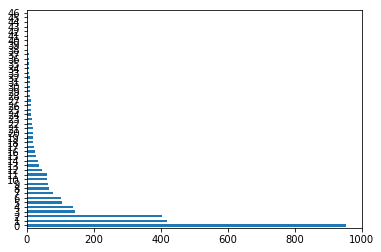

In [23]:
states.adminname1.plot.barh()